In this notebook I worked with the time frames data, from my sensor. I used the function, wchich I implemented on Raspberry Pi. 

In [33]:
from asyncio.log import logger
from datetime import datetime
from tkinter import messagebox
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import logging
import time
import calendar
import string
import tkinter as tk
from numpy import isin
import numpy as np

In [34]:
class PlotData:
    def __init__(self) -> None:
        pass

    def format_date(
        self,
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
    ) -> list:

        start_date = "{} {}".format(selected_start_date, selected_start_time)
        end_date = "{} {}".format(selected_end_date, selected_end_time)

        times = [start_date, end_date]

        try:
            format_dates = [datetime.strptime(i, "%d/%m/%y %H:%M:%S") for i in times]
        except ValueError:
            format_dates = [datetime.strptime(i, "%m/%d/%y %H:%M:%S") for i in times]

        return format_dates

    def logging_err(self, type_err):

        if type_err == "data_plot_err":
            return logger.warn(
                logging.warning("{} Not selected data to plot".format(datetime.now()))
            )
        elif type_err == "hour_data_err":
            return logger.warn(
                logging.warning("{} Wrong format".format(datetime.now()))
            )

    def selected_values(self, selected_values):
        return selected_values

    @staticmethod
    def plot_chart(
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
        selected_vars,
    ):

        plt.close()

        plot = PlotData()

        filter_values = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

        bool_values = dict(zip(filter_values, plot.selected_values(selected_vars)))

        filtered_values = []

        filtered_values = [key for key, val in bool_values.items() if val == 1]

        logging.info(filtered_values)

        try:
            full_time = plot.format_date(
                selected_start_date,
                selected_start_time,
                selected_end_date,
                selected_end_time,
            )
        except ValueError:
            print("Hour Err".upper())
            plot.logging_err("hour_data_err")

        air_poll_df = pd.read_csv("air_pollution_smog_clear.csv", sep=",")
        air_poll_df.pop("entry_id")
        air_poll_df.groupby("PM1").mean()

        try:

            [pd.to_datetime(i) for i in full_time]

            start_date = full_time[0]
            end_date = full_time[1]
            air_poll_df["date"] = pd.to_datetime(air_poll_df["date"])
            plot_df = (air_poll_df["date"] >= start_date) & (
                air_poll_df["date"] <= end_date
            )
            plot_df_2 = air_poll_df.loc[plot_df]

            print(plot_df_2.describe())

            plt.rcParams["figure.figsize"] = [16.0, 6.0]
            plt.rcParams["figure.autolayout"] = True

            # # calculate the yearly average air temperature
            # plot_df_2['PM1',"PM2.5","PM10"] = df_temperature.mean(axis=1)

            # # drop columns containing monthly values
            # df_temperature = plot_df_2[['PM1',"PM2.5","PM10"]]

            # p.plot(range(20),range(20))
            try:
                plot_df_2.plot(
                    x="date",
                    y=filtered_values,
                )
                # plt.xticks(np.arange(0,151,25))
                # plt.xticks(np.arange(0,520769,10))
                plt.suptitle(
                    "Wartości mierzone przez miernik w okresie\n{} Do {} ".format(
                        start_date, end_date
                    ).upper(),
                    fontsize=12,
                    color="black",
                )

                plt.xlabel("Data", fontsize=12, color="black")
                plt.ylabel("Wartości", fontsize=12, color="black")
                # plt.average(20,20,10)
                plt.show()
            except TypeError:
                print("No Data!".upper())
                plot.logging_err("data_plot_err")

                print(air_poll_df.head())

        except UnboundLocalError:
            pass

    @staticmethod
    def get_month_description(
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
        selected_vars,
    ):

        plt.close()

        plot = PlotData()

        filter_values = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

        bool_values = dict(zip(filter_values, plot.selected_values(selected_vars)))

        filtered_values = []

        filtered_values = [key for key, val in bool_values.items() if val == 1]

        logging.info(filtered_values)

        try:
            full_time = plot.format_date(
                selected_start_date,
                selected_start_time,
                selected_end_date,
                selected_end_time,
            )
        except ValueError:
            print("Hour Err".upper())
            plot.logging_err("hour_data_err")

        air_poll_df = pd.read_csv("air_pollution_smog_clear.csv", sep=",")
        air_poll_df.pop("entry_id")
        air_poll_df.groupby("PM1").mean()

        try:

            [pd.to_datetime(i) for i in full_time]

            start_date = full_time[0]
            end_date = full_time[1]
            air_poll_df["date"] = pd.to_datetime(air_poll_df["date"])
            plot_df = (air_poll_df["date"] >= start_date) & (
                air_poll_df["date"] <= end_date
            )
            plot_df_2 = air_poll_df.loc[plot_df]

            finnally_df = plot_df_2.describe()

        except UnboundLocalError:
            pass


plot_vars_template = ["PM1", PM2.5, "PM10", "temp", "pressure", "humidity"]


                 PM1          PM2.5           PM10           temp  \
count  260381.000000  260380.000000  260380.000000  260380.000000   
mean       27.901529      44.170758      55.388482       5.891992   
std        17.790023      32.212376      40.207758      15.261725   
min         0.000000       0.000000       0.000000    -142.710010   
25%        16.000000      22.000000      26.000000       1.090000   
50%        26.000000      40.000000      50.000000       3.750000   
75%        36.000000      57.000000      75.000000       7.690000   
max       286.000000     702.000000     948.000000     194.990010   

            pressure       humidity  
count  260380.000000  260380.000000  
mean     1014.162922      60.599705  
std        98.571549      19.683561  
min      -363.195890       0.000000  
25%      1014.038180      47.446290  
50%      1023.121950      65.730470  
75%      1029.494870      75.936765  
max      2154.949460     100.000000  


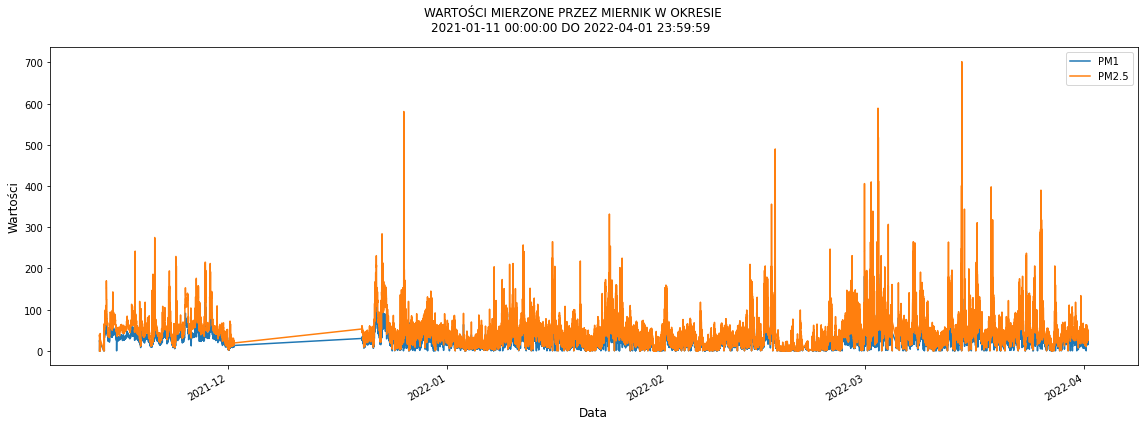

In [35]:
plot = PlotData()


def get_selected_vars(sel_vars):
    return [1 if isinstance(i, str) else 0 for i in sel_vars]


selected_start_date = "11/1/21"
selected_start_time = "00:00:00"
selected_end_date = "01/04/22"
selected_end_time = "23:59:59"
selected_vars = get_selected_vars(["PM1", "PM2.5", 0, 0, 0, 0])

plot.plot_chart(
    selected_start_date,
    selected_start_time,
    selected_end_date,
    selected_end_time,
    selected_vars,
)


# air_poll_df.groupby("PM1").mean()

<div class="alert alert-block alert-warning">
<b>Example:</b> Period of collect data from sensor:
inside code cells, or use for mathematical formulas if needed.
</div> 
<b>start:</b><t> 13/11/2022</t> <br>
<b>end:</b> <t>  01/04/2022</t> <br>

<b>NOVEMBER 2021</b> <br>
<b>start:</b>13/11/2022 <br>
<b>end:</b>  31/11/2022

November
               PM1        PM2.5         PM10         temp     pressure  \
count  2114.000000  2114.000000  2114.000000  2114.000000  2114.000000   
mean     41.873699    68.840587    86.105014     6.740629  1020.371089   
std      12.629514    23.962003    28.465393     8.079182    55.045467   
min       0.000000     0.000000     0.000000     3.880000  -241.325000   
25%      36.000000    56.000000    72.000000     5.390000  1019.804368   
50%      40.000000    64.000000    86.000000     5.910000  1021.811250   
75%      46.000000    78.000000    98.500000     6.920000  1025.266295   
max      91.000000   170.000000   202.000000   187.140000  1028.884160   

          humidity  
count  2114.000000  
mean     69.876681  
std       6.830344  
min      30.946290  
25%      67.345945  
50%      71.180665  
75%      75.003420  
max     100.000000  


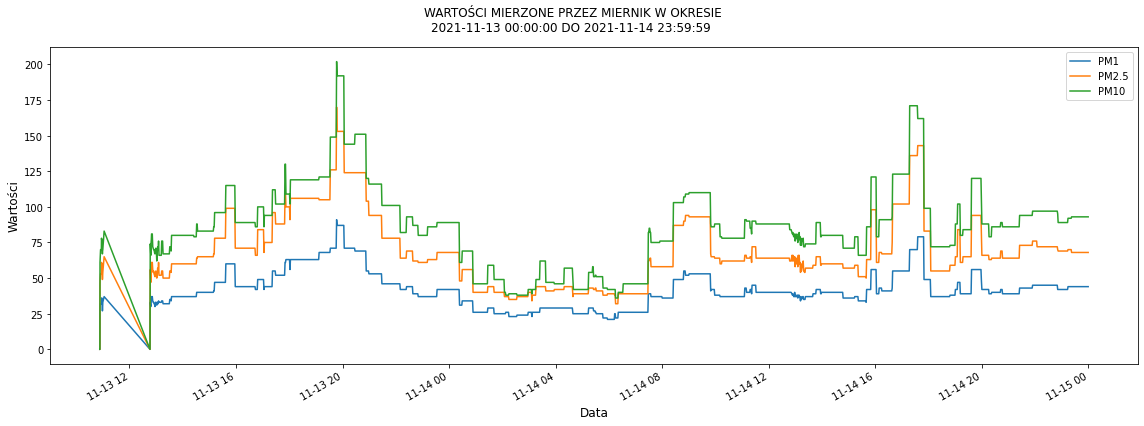

December
              PM1       PM2.5        PM10        temp     pressure    humidity
count  826.000000  826.000000  826.000000  826.000000   826.000000  826.000000
mean    13.962470   19.623487   23.269976  186.272482  -235.292503   99.785117
std      8.044259   12.438937   15.770429   12.443653    86.529878    3.082802
min      2.000000    2.000000    3.000000    7.690000  -241.325000   55.056640
25%      8.000000   11.000000   12.000000  187.140000  -241.325000  100.000000
50%     13.000000   18.000000   19.500000  187.140000  -241.325000  100.000000
75%     18.000000   24.000000   31.000000  187.140000  -241.325000  100.000000
max     46.000000   72.000000   96.000000  187.140000  1004.425170  100.000000


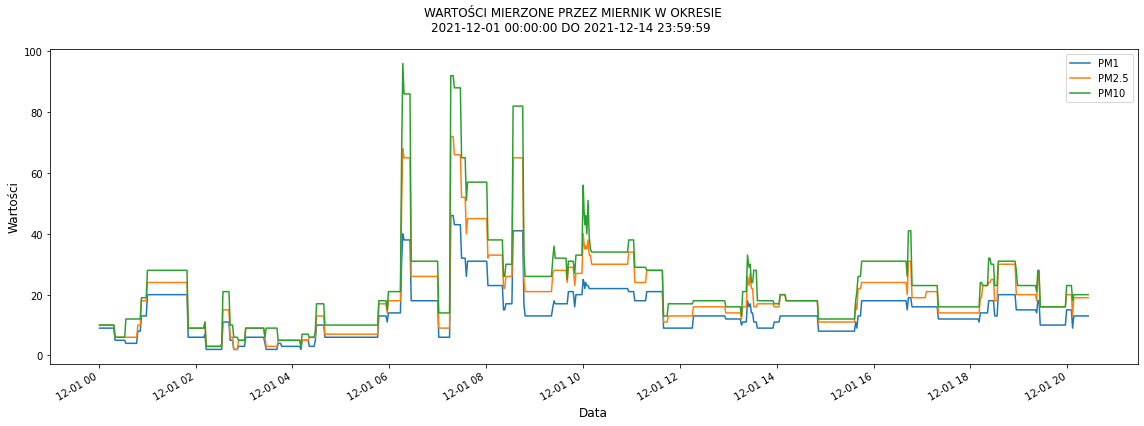

January
                PM1         PM2.5          PM10          temp      pressure  \
count  69394.000000  69394.000000  69394.000000  69394.000000  69394.000000   
mean      25.338127     39.769634     50.525449      1.918931   1022.427171   
std       15.756796     27.734835     35.211294      3.473557     10.055181   
min        0.000000      0.000000      0.000000     -6.330000    994.319580   
25%       14.000000     20.000000     24.000000     -0.410000   1014.750777   
50%       24.000000     36.000000     45.000000      1.720000   1023.190800   
75%       34.000000     53.000000     70.000000      3.380000   1029.972598   
max      141.000000    332.000000    450.000000     14.190000   1038.802860   

           humidity  
count  69394.000000  
mean      70.418289  
std       10.488417  
min       24.324220  
25%       63.692380  
50%       72.803220  
75%       78.460940  
max       93.930660  


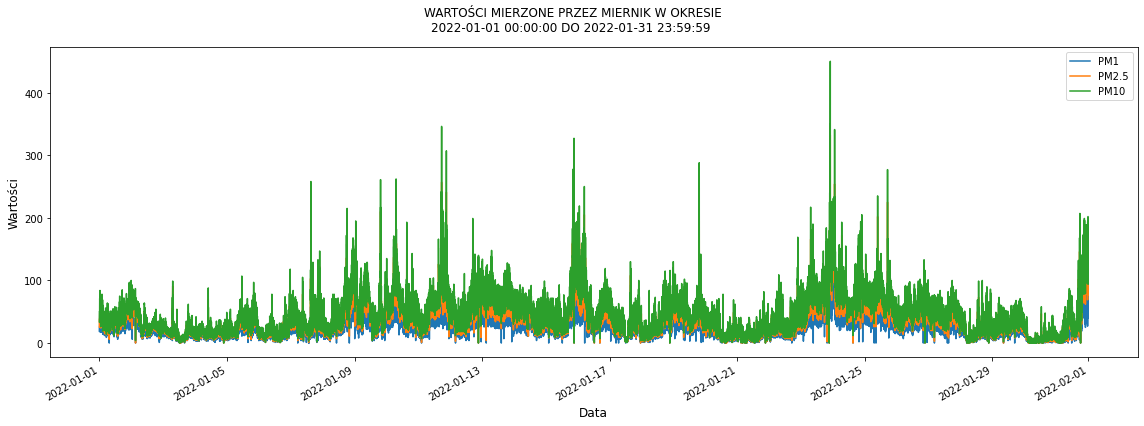

C:\Users\admin\AppData\Local\Temp\ipykernel_17340\1973953375.py:32: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  return logger.warn(


February
HOUR ERR


C:\Users\admin\AppData\Local\Temp\ipykernel_17340\1973953375.py:32: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  return logger.warn(


March
HOUR ERR


In [36]:
PLOT = PlotData()


def get_month(month: str):

    if month == "November":
        start_date = "13/11/21"
        end_date = f"{calendar.monthrange(2021, 11)[1]}/11/21"
        end_date = "14/11/21"
    elif month == "December":
        start_date = "01/12/21"
        # end_date = f"{calendar.monthrange(2021, 12)[1]}/12/21"
        end_date = "14/12/21"

    elif month == "January":
        start_date = "01/01/22"
        end_date = f"{calendar.monthrange(2022, 1)[1]}/01/22"

    elif month == "February":
        start_date = "01/02/2022"
        end_date = f"{calendar.monthrange(2022, 2)[1]}/02/22"

    elif month == "March":
        start_date = "01/03/2022"
        end_date = f"{calendar.monthrange(2022, 3)[1]}/03/22"

    return [start_date, end_date]


def get_month_start_end_hours():
    return ["00:00:00", "23:59:59"]


def plot_selected_month(month):
    print(month)

    start_date = get_month(month)[0]
    end_date = get_month(month)[1]
    start_time = get_month_start_end_hours()[0]
    end_time = get_month_start_end_hours()[1]

    PlotData.plot_chart(
        start_date,
        start_time,
        end_date,
        end_time,
        selected_vars=get_selected_vars(["PM1", "PM2.5", "PM10", 0, 0, 0]),
    )


def month_description(month):
    print(month)

    start_date = get_month(month)[0]
    end_date = get_month(month)[1]
    start_time = get_month_start_end_hours()[0]
    end_time = get_month_start_end_hours()[1]

    PlotData.get_month_description(
        start_date,
        start_time,
        end_date,
        end_time,
        selected_vars=get_selected_vars(["PM1", "PM2.5", "PM10", 0, 0, 0]),
    )


months = [
    "November",
    "December",
    "January",
    "February",
    "March",
]

for i in months:
    plot_selected_month(i)

In [37]:
PlotData.plot_chart("01/02/22", "00:00:00", "02/28/22", "23:59:59", ["PM1"])

C:\Users\admin\AppData\Local\Temp\ipykernel_17340\1973953375.py:28: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  return logger.warn(


                 PM1          PM2.5           PM10           temp  \
count  135734.000000  135734.000000  135734.000000  135734.000000   
mean       22.671689      35.240684      44.480882       3.739821   
std        16.107336      28.065885      35.486066       7.737309   
min         0.000000       0.000000       0.000000    -142.590000   
25%        10.000000      14.000000      17.000000       0.870000   
50%        21.000000      31.000000      37.000000       2.930000   
75%        31.000000      49.000000      64.000000       5.960000   
max       224.000000     490.000000     608.000000     187.140000   

            pressure       humidity  
count  135734.000000  135734.000000  
mean     1018.465747      66.305219  
std        46.615931      13.298815  
min      -242.100950       0.000000  
25%      1012.981900      59.208010  
50%      1019.965240      69.386720  
75%      1028.490810      76.165040  
max      1303.550170     100.000000  
NO DATA!
                 date   PM1

In [38]:
# months description
description = PlotData()

for i in months:
    month_description(i)

November
December
January


C:\Users\admin\AppData\Local\Temp\ipykernel_17340\1973953375.py:32: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  return logger.warn(


February
HOUR ERR


C:\Users\admin\AppData\Local\Temp\ipykernel_17340\1973953375.py:32: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  return logger.warn(


March
HOUR ERR
